In [31]:
# Install kagglehub
!pip install kagglehub

In [2]:
# Import kagglehub and download the dataset
import kagglehub
import os

In [3]:
# Download the dataset to a specific directory
dataset_path = kagglehub.dataset_download("confirm/google-landmark-dataset-v2-micro")

100%|██████████| 3.03G/3.03G [00:39<00:00, 82.2MB/s]

Extracting files...


In [4]:
# Ensure dataset is copied to the visible Colab file structure
!cp -r {dataset_path} /content/dataset/

In [5]:
# Print where the dataset is now stored
print("Dataset is now visible at: /content/dataset")

Dataset is now visible at: /content/dataset


In [7]:
# List all files and directories to ensure they are visible
for root, dirs, files in os.walk("/content/dataset/gldv2_micro"):
    print(f"Directory: {root}")
    for file in files:
        print(f" - {file}")


Streaming output truncated to the last 5000 lines.
 - fd62aa2eaea804f0.jpg
 - eefa5789a508064f.jpg
 - d2ef972de1028c9d.jpg
 - e821f02c7f9eabde.jpg
 - fe07b2b3faa1474b.jpg
 - f165d3f169a69a2c.jpg
 - feb9a199d355239b.jpg
 - c31764bb86739540.jpg
 - e9656da5ccd9acf5.jpg
 - c4f545d03ffdd640.jpg
 - e263a19482311d1e.jpg
 - dfb0d380d906caf2.jpg
 - f3992a7ad8d415a9.jpg
 - f2067e5fce65ae0d.jpg
 - e58cb580d19a504a.jpg
 - ec54462602b1a5bc.jpg
 - f90861fc79e9e228.jpg
 - dd5d0f76e39e6cb2.jpg
 - f5e5999a35869f0e.jpg
 - f723620ed46a9b0c.jpg
 - f00bcdd988290bc3.jpg
 - f3cf525f3c045a3d.jpg
 - eefa503512b471b6.jpg
 - d7e518a60c6a7a10.jpg
 - da1747592d6a3e08.jpg
 - ecd6bbb0a6b744fe.jpg
 - f4fafb9fa0119e5d.jpg
 - e2d067cc10ce1850.jpg
 - af4bd49c315d14ba.jpg
 - da9a31159a063423.jpg
 - e78c592a3f309445.jpg
 - fe5d9fc0048bdbb4.jpg
 - af844582d990df7c.jpg
 - d775d9369b93e8bc.jpg
 - e9ce5d6c46b0fefe.jpg
 - f5abacb2a7aaa76b.jpg
 - e5ffd144f78984f9.jpg
 - f1b39c036ede7ff9.jpg
 - c8be2c403927b9be.jpg
 - dc7d85032c

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [19]:
# Update paths
images_folder = "/content/dataset/gldv2_micro/images"
labels_file = "/content/dataset/gldv2_micro/train.csv"

In [20]:
# Load labels CSV
labels_df = pd.read_csv(labels_file)

In [21]:
# Display the first few rows of the labels file to verify
print("Sample labels:")
print(labels_df.head())

Sample labels:
               filename  landmark_id
0  fd1a404e12754adb.jpg            0
1  f8fc91efb0d408b3.jpg            0
2  f754a84914ad92f3.jpg            0
3  f2fa9bde2d444ede.jpg            0
4  f10af00527cb5f5b.jpg            0


In [23]:
print(labels_df.tail())

                   filename  landmark_id
23289  e425afbb75ad4bfb.jpg         3102
23290  d7da2684287d4844.jpg         3102
23291  b80854a231f44e8d.jpg         3102
23292  457cb65ba4a1ee3d.jpg         2029
23293  1382256e230d5696.jpg         2029


In [24]:
# Display sample images
sample = labels_df.sample(5)

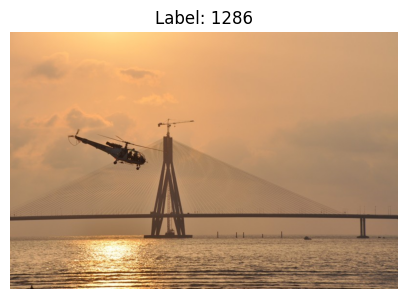

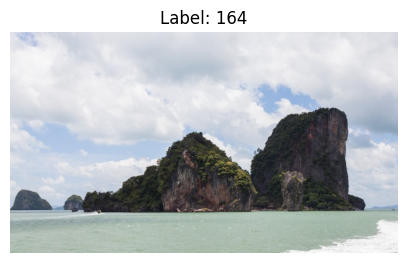

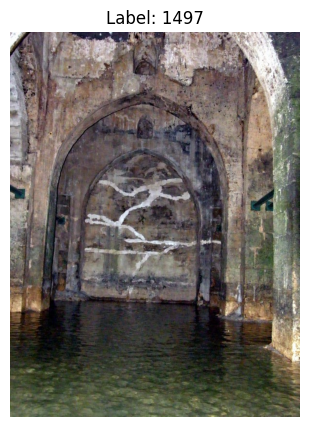

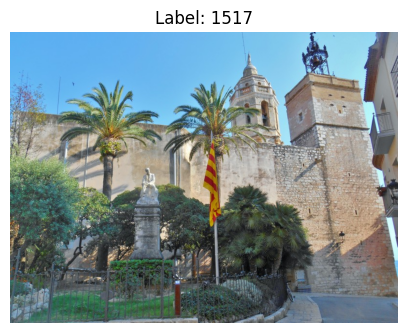

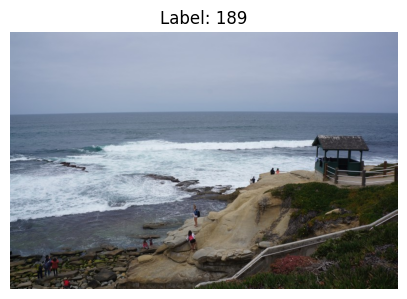

In [36]:
for _, row in sample.iterrows():
    img_id = row['filename']
    label = row['landmark_id']
    img_path = os.path.join(images_folder, f"{img_id}")
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis("off")
        plt.show()
    else:
        print(f"Image {img_path} not found.")

In [14]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
# Preprocess the uploaded image
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

Saving 1.jpg to 1 (3).jpg


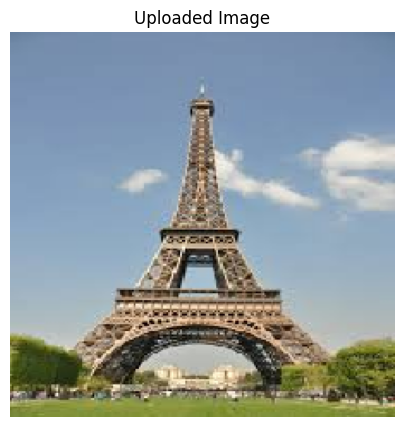

Predicted Landmark ID: 123
Prediction Confidence: 0.95


In [47]:
# Function to upload and predict a new image
def upload_and_predict():
    """
    Handles image upload, preprocessing, prediction, and display.
    """
    # Upload a new image
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    # Display the uploaded image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size if needed
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title("Uploaded Image")
    plt.axis("off")
    plt.show()

    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Predict the landmark ID and confidence
    prediction = predict_landmark(img_array)
    landmark_id = prediction["landmark_id"]
    confidence = prediction["confidence"]

    # Display prediction results
    print(f"Predicted Landmark ID: {landmark_id}")
    print(f"Prediction Confidence: {confidence:.2f}")

# Trigger the function to upload and predict
upload_and_predict()